In [98]:
from models import RedshiftSpace
import models as md
import pickle
import matplotlib.pyplot as plt
import numpy as np
import importlib
import seaborn as sns
from CentralStreamingModel.utils import plot_tools as pt
sns.set_context('talk')
import time
from CentralStreamingModel.integral.real2redshift import compute_integrand, integrate
from CentralStreamingModel.tpcfs.tpcf_tools import get_multipoles, get_wedges
from scipy.integrate import simps

In [2]:
n_boxes = range(1,15)
boxsize = 2000
snapshot = 20

rs = []
for i, box in enumerate(n_boxes):
    rs.append(RedshiftSpace(box, 2000, 20))

In [3]:
importlib.reload(md)

<module 'models' from '/home/c-cuesta/CentralStreamingModel/comparisons/models.py'>

In [4]:
t1 = time.time()
mean_rs = md.MeanRedshiftSpace( boxsize, snapshot, rs)
print(f'It took {time.time() - t1} seconds.')

Initiating Streaming
Finishied Streaming
Initiating gaussian
Finished gaussian
It took 61.34808945655823 seconds.


In [5]:
s_c = rs[0].measured.s_c


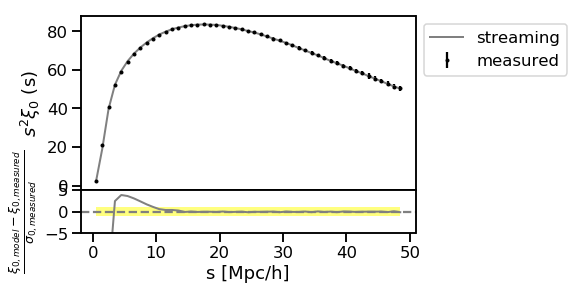

In [6]:
pt.plot_attribute_residual( mean_rs, ['streaming'],
                    'monopole',  r'$s^2\xi_0$ (s)', 
                           r'$\frac{\xi_{0,model} - \xi_{0, measured}}{\sigma_{0, measured}}$')

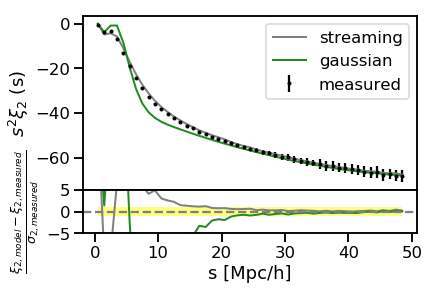

In [8]:
pt.plot_attribute_residual(mean_rs, ['streaming', 'gaussian'],
                    'quadrupole', r'$s^2\xi_2$ (s)',
        r'$\frac{\xi_{2,model} - \xi_{2, measured}}{\sigma_{2, measured}}$')

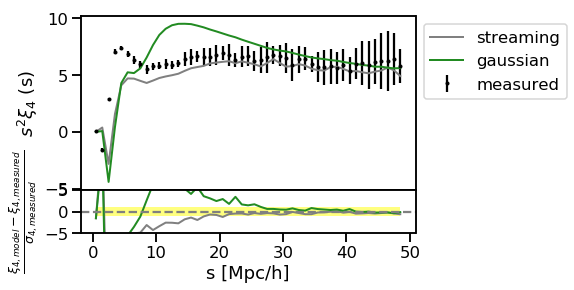

In [9]:
pt.plot_attribute_residual( mean_rs, ['streaming', 'gaussian'],
                    'hexadecapole', r'$s^2\xi_4$ (s)',
        r'$\frac{\xi_{4,model} - \xi_{4, measured}}{\sigma_{4, measured}}$')


In [10]:
mean_rs.skewt_simps = md.Skewt(mean_rs.per_box_list[0].measured.r,
                            mean_rs.per_box_list[0].measured.v_r, mean_rs.per_box_list[0].measured.v_t,
                             mean_rs.measured.jointpdf_rt.mean, mean_rs.mean_tpcf_dict, truncate = 20,
                            integration = 'simpsons')


Found popt
Computing integral
Finished streaming integral


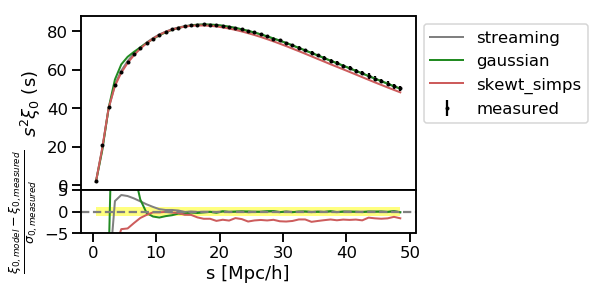

In [13]:
pt.plot_attribute_residual( mean_rs, ['streaming','gaussian', 'skewt_simps'],
                    'monopole',  r'$s^2\xi_0$ (s)', 
                r'$\frac{\xi_{0,model} - \xi_{0, measured}}{\sigma_{0, measured}}$')

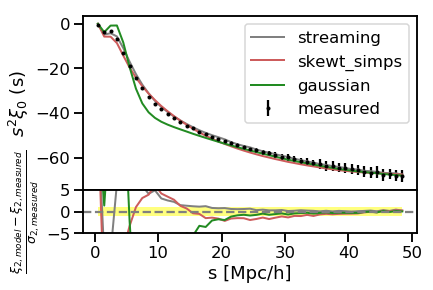

In [14]:
pt.plot_attribute_residual( mean_rs, ['streaming','skewt_simps', 'gaussian'],
                    'quadrupole',  r'$s^2\xi_0$ (s)', 
                r'$\frac{\xi_{2,model} - \xi_{2, measured}}{\sigma_{2, measured}}$')

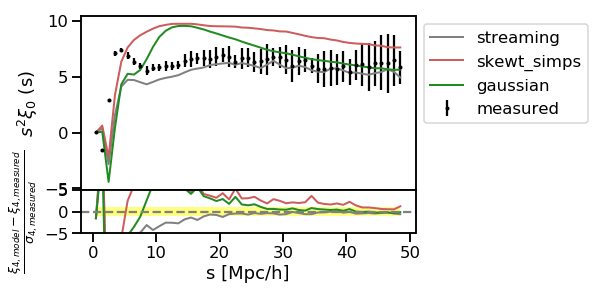

In [15]:
pt.plot_attribute_residual( mean_rs, ['streaming','skewt_simps', 'gaussian'],
                    'hexadecapole',  r'$s^2\xi_0$ (s)', 
                r'$\frac{\xi_{4,model} - \xi_{4, measured}}{\sigma_{4, measured}}$')

In [29]:
v_los = mean_rs.per_box_list[0].measured.v_los
pdf = np.zeros_like(mean_rs.measured.jointpdf_los.mean)

for j, j_value in enumerate(mean_rs.per_box_list[0].measured.r_perp):
    for k, k_value in enumerate(mean_rs.per_box_list[0].measured.r_parallel):
        for i, v in enumerate(v_los):
            pdf[j,k,i] = mean_rs.skewt_simps.jointpdf_los(j_value, k_value, v_los[i])

In [34]:
n_mu_bins = 60
mu_bins = np.linspace(0.,1,n_mu_bins)
s= np.arange(0., 50., 1.)

In [40]:
s_c = 0.5 * (s[1:] + s[:-1])

In [100]:
# Renormalize
wvlos = abs(mean_rs.per_box_list[0].measured.v_los[1] - mean_rs.per_box_list[0].measured.v_los[0])

threshold = (v_los > -20) & (v_los < 20)
skewt_norm20 = pdf/simps(pdf[:,:,threshold],v_los[threshold],  axis = -1)[:,:,np.newaxis]
skewt_norm20 = skewt_norm20[:,:,threshold]

In [101]:
rparallel, result_integrand_norm20, pdf_contribution_norm20 = compute_integrand(s, s,
            mean_rs.mean_tpcf_dict, skewt_norm20,
            mean_rs.per_box_list[0].measured.r_parallel, mean_rs.per_box_list[0].measured.v_los[threshold])

In [102]:
pi_sigma_norm20 = integrate(rparallel, result_integrand_norm20)

In [103]:
s_mu_norm20, monopole_norm20, quadrupole_norm20, hexadecapole_norm20 = \
                     get_multipoles(s, pi_sigma_norm20, s, mu_bins)

In [104]:
mean_rs.skewt_norm20 = md.allModels()
mean_rs.skewt_norm20.s_c = s_c
mean_rs.skewt_norm20.color = 'blue'
mean_rs.skewt_norm20.monopole = monopole_norm20
mean_rs.skewt_norm20.quadrupole = quadrupole_norm20
mean_rs.skewt_norm20.hexadecapole = hexadecapole_norm20


In [105]:
threshold = (v_los > -17) & (v_los < 17)
skewt_norm17 = pdf/simps(pdf[:,:,threshold],v_los[threshold],  axis = -1)[:,:,np.newaxis]
skewt_norm17 = skewt_norm17[:,:,threshold]

In [106]:
rparallel, result_integrand_norm17, pdf_contribution_norm17 = compute_integrand(s, s,
            mean_rs.mean_tpcf_dict, skewt_norm17,
            mean_rs.per_box_list[0].measured.r_parallel, mean_rs.per_box_list[0].measured.v_los[threshold])

In [107]:
pi_sigma_norm17 = integrate(rparallel, result_integrand_norm17)

s_mu_norm17, monopole_norm17, quadrupole_norm17, hexadecapole_norm17 = \
                     get_multipoles(s, pi_sigma_norm17, s, mu_bins)

In [108]:
mean_rs.skewt_norm17 = md.allModels()
mean_rs.skewt_norm17.s_c = s_c
mean_rs.skewt_norm17.color = 'cyan'
mean_rs.skewt_norm17.monopole = monopole_norm17
mean_rs.skewt_norm17.quadrupole = quadrupole_norm17
mean_rs.skewt_norm17.hexadecapole = hexadecapole_norm17

In [109]:
threshold = (v_los > -15) & (v_los < 15)
skewt_norm15 = pdf/simps(pdf[:,:,threshold],v_los[threshold],  axis = -1)[:,:,np.newaxis]
skewt_norm15 = skewt_norm15[:,:,threshold]

In [110]:
rparallel, result_integrand_norm15, pdf_contribution_norm15 = compute_integrand(s, s,
            mean_rs.mean_tpcf_dict, skewt_norm15,
            mean_rs.per_box_list[0].measured.r_parallel, mean_rs.per_box_list[0].measured.v_los[threshold])

In [111]:
pi_sigma_norm15 = integrate(rparallel, result_integrand_norm15)

s_mu_norm15, monopole_norm15, quadrupole_norm15, hexadecapole_norm15 = \
                     get_multipoles(s, pi_sigma_norm15, s, mu_bins)

In [112]:
mean_rs.skewt_norm15 = md.allModels()
mean_rs.skewt_norm15.s_c = s_c
mean_rs.skewt_norm15.color = 'black'
mean_rs.skewt_norm15.monopole = monopole_norm15
mean_rs.skewt_norm15.quadrupole = quadrupole_norm15
mean_rs.skewt_norm15.hexadecapole = hexadecapole_norm15

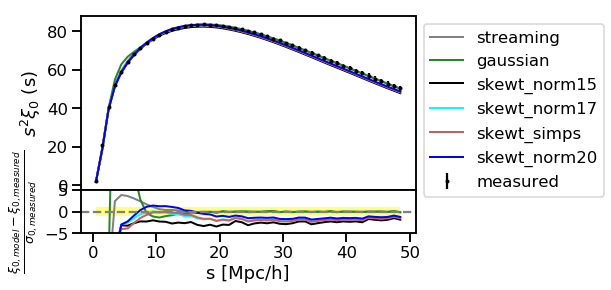

In [123]:
pt.plot_attribute_residual( mean_rs, ['streaming','gaussian', 'skewt_norm15', 'skewt_norm17','skewt_simps', 'skewt_norm20'],
                    'monopole',  r'$s^2\xi_0$ (s)', 
                r'$\frac{\xi_{0,model} - \xi_{0, measured}}{\sigma_{0, measured}}$')

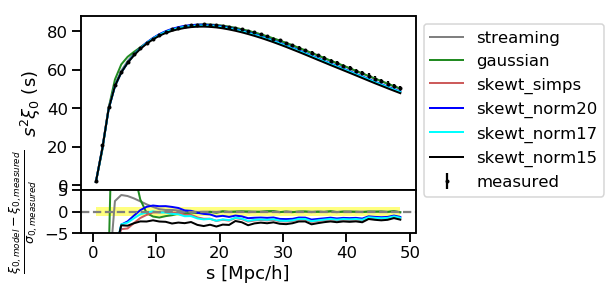

In [118]:
pt.plot_attribute_residual( mean_rs, ['streaming','gaussian', 'skewt_simps', 'skewt_norm20',
                                      'skewt_norm17','skewt_norm15'],
                    'monopole',  r'$s^2\xi_0$ (s)', 
                r'$\frac{\xi_{0,model} - \xi_{0, measured}}{\sigma_{0, measured}}$')

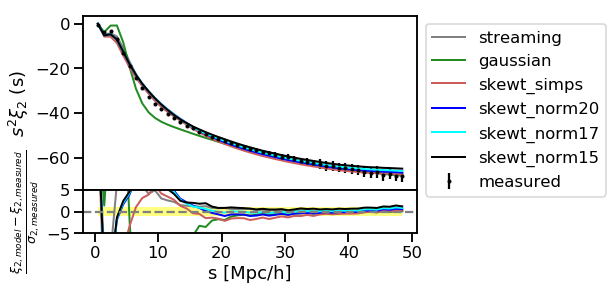

In [119]:
pt.plot_attribute_residual( mean_rs, ['streaming','gaussian', 'skewt_simps', 'skewt_norm20',
                                      'skewt_norm17','skewt_norm15'],
                    'quadrupole',  r'$s^2\xi_2$ (s)', 
                r'$\frac{\xi_{2,model} - \xi_{2, measured}}{\sigma_{2, measured}}$')

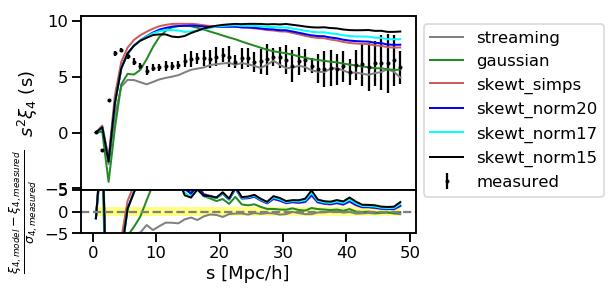

In [120]:
pt.plot_attribute_residual( mean_rs, ['streaming','gaussian', 'skewt_simps', 'skewt_norm20',
                                      'skewt_norm17','skewt_norm15'],
                    'hexadecapole',  r'$s^2\xi_4$ (s)', 
                r'$\frac{\xi_{4,model} - \xi_{4, measured}}{\sigma_{4, measured}}$')